In [82]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
#download library google-play-scraper
!pip install google-play-scraper

# Import library yang di butuhkan

In [83]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [84]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.instagram.android',
    lang='id',  #disini kita mau scrape data ulasan aplikasi yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1100, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [85]:
# simpan ke data mentah yang belum di sortir
df_halo = pd.DataFrame(np.array(result),columns=['review'])

df_halo = df_halo.join(pd.DataFrame(df_halo.pop('review').tolist()))

df_halo.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,febb7dd4-aee2-47fd-ae4b-097ab9c43fb7,fayza kalyn,https://play-lh.googleusercontent.com/a/ACg8oc...,makin update makin banyak bug yang terjadi. se...,1,1395,302.1.0.36.111,2023-10-09 18:50:32,None,None,302.1.0.36.111
1,4fef29c9-77d0-47d9-bc2b-ee5b50c03850,Nurhuda Sholihin,https://play-lh.googleusercontent.com/a-/ALV-U...,Enggak paham sama Instagram sekarang. Fitur mu...,1,1547,302.1.0.36.111,2023-10-02 16:29:28,None,None,302.1.0.36.111
2,5a3c449e-56a4-4040-8196-7e0deb614158,Bunga Riska Wijaya,https://play-lh.googleusercontent.com/a-/ALV-U...,Bingung & kecewa karena mau update stories ata...,2,1917,302.1.0.36.111,2023-09-28 21:56:25,None,None,302.1.0.36.111
3,045dc72c-5655-4571-bf2e-dc4991586ce6,ririn yunita,https://play-lh.googleusercontent.com/a/ACg8oc...,"Serius kecewa banget sama Instagram, udah bebe...",1,1553,302.1.0.36.111,2023-09-29 15:21:53,None,None,302.1.0.36.111
4,2f6298a2-0111-4b33-93af-9155a3ea2be7,Taufan Abimanyu,https://play-lh.googleusercontent.com/a/ACg8oc...,Kenapa ya ig saya gabisa buat story pake musik...,2,1803,302.1.0.36.111,2023-09-27 22:10:41,None,None,302.1.0.36.111


In [86]:
len(df_halo.index) # menghitung kembali jumlah data yang di ambil

1100

In [87]:
df_halo[['userName', 'score','at', 'content']].head()  #dari scrapping tsb didapatkan banyak sekali kolom, kemudian kolom" tsb kita filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,fayza kalyn,1,2023-10-09 18:50:32,makin update makin banyak bug yang terjadi. se...
1,Nurhuda Sholihin,1,2023-10-02 16:29:28,Enggak paham sama Instagram sekarang. Fitur mu...
2,Bunga Riska Wijaya,2,2023-09-28 21:56:25,Bingung & kecewa karena mau update stories ata...
3,ririn yunita,1,2023-09-29 15:21:53,"Serius kecewa banget sama Instagram, udah bebe..."
4,Taufan Abimanyu,2,2023-09-27 22:10:41,Kenapa ya ig saya gabisa buat story pake musik...


In [88]:
#Run This Code to Sort the Data By Date 

new_df = df_halo[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
207,Makmur Amalia,1,2023-10-14 06:16:18,"Ngga jelas bangettt, filter Ig malah pada bura..."
199,Rovi Soleha,1,2023-10-14 04:58:05,"Instagram saya tiba2 mati ini,harus muat ulang..."
966,Tommy Rakitz,1,2023-10-14 04:10:28,"kualitas foto dan video di HP android jelek, t..."
1003,Anggina Salsabila,1,2023-10-13 07:30:53,Min akun gw ke hack gara² abis download apk un...
203,Inama Nurrahman,1,2023-10-12 22:58:18,Ada apa dengan Instagram. Filter buram dan tid...


In [89]:
# simpan ke variable my_df
my_df = sorted_df[['userName', 'score','at', 'content']] #kemudian kita simpan ke variabel my_df

In [90]:
#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score. 
my_df=my_df[['content', 'score']]

In [91]:
# print my_df untuk melihat hasil sortir ulang
# content itu adalah ulasan dan score itu bintang yang di dapatkan untuk ulasan aplikasi
my_df.head()

,content,score
207,"Ngga jelas bangettt, filter Ig malah pada bura...",1
199,"Instagram saya tiba2 mati ini,harus muat ulang...",1
966,"kualitas foto dan video di HP android jelek, t...",1
1003,Min akun gw ke hack gara² abis download apk un...,1
203,Ada apa dengan Instagram. Filter buram dan tid...,1


# Pelabelan 

In [92]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
207,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif
199,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif
966,"kualitas foto dan video di HP android jelek, t...",1,Negatif
1003,Min akun gw ke hack gara² abis download apk un...,1,Negatif
203,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif
167,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif
984,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif
183,Instagram aplikasi tempat media sosial yg nyam...,5,Positif
590,"sesudah logout lalu login kembali, dan di mint...",1,Negatif
1026,"tolong Ig di perbaiki lgi,simpan foto ke galer...",3,None


In [93]:
# export ke csv data cleaning
my_df.to_csv("dataset/data_ulasan_instagram.csv", index=False)

## exploratory data analysis (EDA)
proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi

In [94]:
# di pecah berdasarkan score
# data belum di cleaning
print(f"Input data has {len(my_df)} rows and {len(my_df.columns)} columns")
print(f"score 1 = {len(my_df[my_df['score']== 1])} rows")
print(f"score 2 = {len(my_df[my_df['score']== 2])} rows")
print(f"score 3 = {len(my_df[my_df['score']== 3])} rows")
print(f"score 4 = {len(my_df[my_df['score']== 4])} rows")
print(f"score 5 = {len(my_df[my_df['score']== 5])} rows")

Input data has 1100 rows and 3 columns
score 1 = 631 rows
score 2 = 184 rows
score 3 = 123 rows
score 4 = 66 rows
score 5 = 96 rows


In [95]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

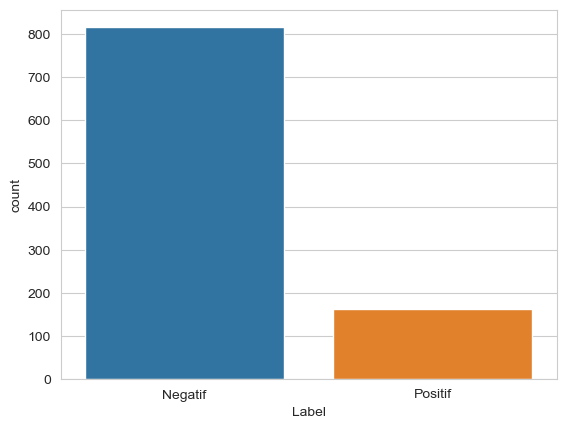

In [96]:
# visual chart berdasarkan label
sns.countplot(x='Label', data=my_df);

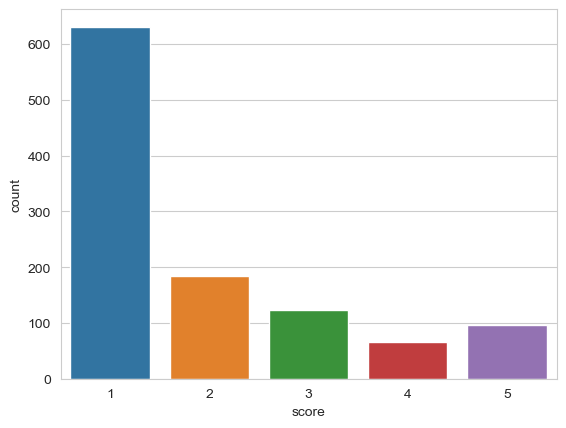

In [97]:
# visual chart berdasarkan score
sns.countplot(x='score', data=my_df);

# Pembersihan data

# data cleaning

In [98]:
# membaca data yang tadi sudah di cleaning
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('dataset/data_ulasan_instagram.csv')
my_df.head(500)

,content,score,Label
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif
...,...,...,...
495,IG selalu eror untuk ngelihat story teman dan ...,1,Negatif
496,Di update malah makin bongkrak mau posting pak...,1,Negatif
497,Knpa makin di-update mlah makin g jelas ya?? H...,1,Negatif
498,"Instagram yg terhormat, dimohon agar di perbai...",1,Negatif


In [99]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe, 
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1100 non-null   object
 1   score    1100 non-null   int64 
 2   Label    977 non-null    object
dtypes: int64(1), object(2)
memory usage: 25.9+ KB


In [101]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1095,False,False,True
1096,False,False,False
1097,False,False,False
1098,False,False,False


In [102]:
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [103]:
my_df.describe()

,score
count,1100.000000
mean,1.920000
std,1.306162
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,5.000000


In [104]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()  

content      0
score        0
Label      123
dtype: int64

# Handling Missing value-Ignore tuple

In [105]:
my_df.dropna(subset=['Label'],inplace = True)

In [106]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [107]:
my_df.head(50)

,content,score,Label
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif
7,Instagram aplikasi tempat media sosial yg nyam...,5,Positif
8,"sesudah logout lalu login kembali, dan di mint...",1,Negatif
10,Kecewa..awalnya audio emang Uda tersedia di pl...,1,Negatif


In [110]:
my_df.to_csv("dataset/data_cleaning.csv", index = False)  #simpan hasil file data cleaning dengan nama shopeepreprocessing.cs

# Text PreProcessing

In [109]:
import pandas as pd
df = pd.read_csv('dataset/data_cleaning.csv')
df.head(50)

,content,score,Label
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif
7,Instagram aplikasi tempat media sosial yg nyam...,5,Positif
8,"sesudah logout lalu login kembali, dan di mint...",1,Negatif
9,Kecewa..awalnya audio emang Uda tersedia di pl...,1,Negatif


# #Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [111]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem)) 
    return my_df

In [112]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif,ngga jelas bangettt filter ig malah pada buram...
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif,instagram saya tiba mati iniharus muat ulang t...
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif,kualitas foto dan video di hp android jelek to...
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif,min akun gw ke hack gara abis download apk unf...
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif,ada apa dengan instagram filter buram dan tida...
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif,kenapa sih gak bisa masuk dan tertulis halaman...
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif,di sec acc tiba ga bisa up feed foto banyakan ...
7,Instagram aplikasi tempat media sosial yg nyam...,5,Positif,instagram aplikasi tempat media sosial yg nyam...
8,"sesudah logout lalu login kembali, dan di mint...",1,Negatif,sesudah logout lalu login kembali dan di minta...
10,Kecewa..awalnya audio emang Uda tersedia di pl...,1,Negatif,kecewaawalnya audio emang uda tersedia di plat...


## Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [113]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif,ngga jelas bangettt filter ig malah pada buram...,ngga bangettt filter ig buram udah coba perbar...
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif,instagram saya tiba mati iniharus muat ulang t...,instagram mati iniharus muat ulang teruss aman...
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif,kualitas foto dan video di hp android jelek to...,kualitas foto video hp android jelek tolong di...
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif,min akun gw ke hack gara abis download apk unf...,min akun gw hack gara abis download apk unfoll...
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif,ada apa dengan instagram filter buram dan tida...,instagram filter buram tolong perbaiki kesemul...
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif,kenapa sih gak bisa masuk dan tertulis halaman...,sih gak masuk tertulis halaman tersedia kesala...
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif,di sec acc tiba ga bisa up feed foto banyakan ...,sec acc ga up feed foto banyakan pake lagu nge...
7,Instagram aplikasi tempat media sosial yg nyam...,5,Positif,instagram aplikasi tempat media sosial yg nyam...,instagram aplikasi media sosial yg nyaman kere...
8,"sesudah logout lalu login kembali, dan di mint...",1,Negatif,sesudah logout lalu login kembali dan di minta...,logout login verifikasi email nomor handphone ...
10,Kecewa..awalnya audio emang Uda tersedia di pl...,1,Negatif,kecewaawalnya audio emang uda tersedia di plat...,kecewaawalnya audio emang uda tersedia platfor...


## Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [114]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif,ngga jelas bangettt filter ig malah pada buram...,ngga bangettt filter ig buram udah coba perbar...,"[ngga, bangettt, filter, ig, buram, udah, coba..."
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif,instagram saya tiba mati iniharus muat ulang t...,instagram mati iniharus muat ulang teruss aman...,"[instagram, mati, iniharus, muat, ulang, terus..."
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif,kualitas foto dan video di hp android jelek to...,kualitas foto video hp android jelek tolong di...,"[kualitas, foto, video, hp, android, jelek, to..."
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif,min akun gw ke hack gara abis download apk unf...,min akun gw hack gara abis download apk unfoll...,"[min, akun, gw, hack, gara, abis, download, ap..."
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif,ada apa dengan instagram filter buram dan tida...,instagram filter buram tolong perbaiki kesemul...,"[instagram, filter, buram, tolong, perbaiki, k..."


## Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [115]:
!pip install Sastrawi

In [116]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [117]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

3451
------------------------
1 : ngga : ngga
2 : bangettt : bangettt
3 : filter : filter
4 : ig : ig
5 : buram : buram
6 : udah : udah
7 : coba : coba
8 : perbarui : baru
9 : uninstall : uninstall
10 : aplikasi : aplikasi
11 : trs : trs
12 : instal : instal
13 : ttep : ttep
14 : aja : aja
15 : kaya : kaya
16 : gitu : gitu
17 : tolong : tolong
18 : diperbaiki : baik
19 : instagram : instagram
20 : mati : mati
21 : iniharus : iniharus
22 : muat : muat
23 : ulang : ulang
24 : teruss : teruss
25 : aman : aman
26 : pusat : pusat
27 : mematikan : mati
28 : yatolong : yatolong
29 : balasan : balas
30 : kualitas : kualitas
31 : foto : foto
32 : video : video
33 : hp : hp
34 : android : android
35 : jelek : jelek
36 : ditambah : tambah
37 : fitur : fitur
38 : timer : timer
39 : kamera : kamera
40 : lumayan : lumayan
41 : min : min
42 : akun : akun
43 : gw : gw
44 : hack : hack
45 : gara : gara
46 : abis : abis
47 : download : download
48 : apk : apk
49 : unfolllwers : unfolllwers
50 : pw : pw


391 : bermasalah : masalah
392 : dicoba : coba
393 : karuan : karuan
394 : bintang : bintang
395 : cerita : cerita
396 : lagunya : lagu
397 : kembalikan : kembali
398 : habis : habis
399 : d : d
400 : notif : notif
401 : huruf : huruf
402 : bold : bold
403 : salah : salah
404 : star : star
405 : aj : aj
406 : to : to
407 : admin : admin
408 : anehnya : aneh
409 : blurnya : blurnya
410 : wktu : wktu
411 : dr : dr
412 : hpku : hpku
413 : cuman : cuman
414 : kejelasannya : jelas
415 : mmg : mmg
416 : error : error
417 : sananya : sana
418 : trmksh : trmksh
419 : konfirmasi : konfirmasi
420 : wajah : wajah
421 : instagramkamera : instagramkamera
422 : blurpadahal : blurpadahal
423 : gerak : gerak
424 : sendiritolong : sendiritolong
425 : tingkatin : tingkatin
426 : dasar : dasar
427 : sy : sy
428 : lemot : lot
429 : loh : loh
430 : tu : tu
431 : sekaranglodingnya : sekaranglodingnya
432 : logo : logo
433 : nungguin : nungguin
434 : kebuka : buka
435 : bisatapi : bisatapi
436 : bangetjd : b

769 : berguna : guna
770 : bertambahnya : tambah
771 : apalgi : apalgi
772 : perbaruan : baru
773 : kotor : kotor
774 : ehh : ehh
775 : dri : dri
776 : nih : nih
777 : please : please
778 : mantep : mantep
779 : durasinya : durasi
780 : storynya : storynya
781 : detik : detik
782 : separah : parah
783 : wooytt : wooytt
784 : kesimpan : simpan
785 : diputar : putar
786 : fix : fix
787 : it : it
788 : nyobak : nyobak
789 : gitudi : gitudi
790 : fotofidio : fotofidio
791 : digaleri : galeri
792 : gaadaapalagi : gaadaapalagi
793 : berhargakirain : berhargakirain
794 : hpkuudah : hpkuudah
795 : reset : reset
796 : hilang : hilang
797 : nyaya : nyaya
798 : gapapa : gapapa
799 : keluarga : keluarga
800 : kesimpentolong : kesimpentolong
801 : perbaikifotoku : perbaikifotoku
802 : semuaah : semuaah
803 : siall : siall
804 : dipake : dipake
805 : filtere : filtere
806 : keliatan : liat
807 : seremtolong : seremtolong
808 : ngalamin : ngalamin
809 : berubahsebagai : berubahsebagai
810 : trima : t

1123 : storyloading : storyloading
1124 : teruuuus : teruuuus
1125 : jaya : jaya
1126 : slalu : slalu
1127 : ngeblurgtu : ngeblurgtu
1128 : bagusaja : bagusaja
1129 : dh : dh
1130 : kmaren : kmaren
1131 : bgus : bgus
1132 : hrus : hrus
1133 : unins : unins
1134 : sma : sma
1135 : seumur : umur
1136 : umur : umur
1137 : fotovideo : fotovideo
1138 : kesave : kesave
1139 : kegaleri : galeri
1140 : oktober : oktober
1141 : welcom : welcom
1142 : aduh : aduh
1143 : gusti : gusti
1144 : ganggu : ganggu
1145 : makiin : makiin
1146 : boro : boro
1147 : melorot : lorot
1148 : terimakasihh : terimakasihh
1149 : burammnggk : burammnggk
1150 : fokus : fokus
1151 : mukatolong : mukatolong
1152 : gmn : gmn
1153 : bs : bs
1154 : dikirim : kirim
1155 : dilihatt : dilihatt
1156 : mencari : cari
1157 : barat : barat
1158 : mukanya : muka
1159 : cantik : cantik
1160 : direstar : direstar
1161 : dl : dl
1162 : kebacaa : kebacaa
1163 : dipasang : pasang
1164 : fotonta : fotonta
1165 : watshap : watshap
116

1466 : mention : mention
1467 : ikutan : ikut
1468 : giveaway : giveaway
1469 : padahl : padahl
1470 : kepake : kepake
1471 : apaapa : apaapa
1472 : selfie : selfie
1473 : kecewafilter : kecewafilter
1474 : buramrusakpecah : buramrusakpecah
1475 : skrgsetiap : skrgsetiap
1476 : fotofoto : fotofoto
1477 : galerihp : galerihp
1478 : nonaktifin : nonaktifin
1479 : dlhybaru : dlhybaru
1480 : suaranyaini : suaranyaini
1481 : iniudh : iniudh
1482 : suaranya : suara
1483 : perkembangannya : kembang
1484 : stuck : stuck
1485 : kesulitan : sulit
1486 : tanggapan : tanggap
1487 : sii : sii
1488 : effeck : effeck
1489 : pecah : pecah
1490 : tontonan : tonton
1491 : drastis : drastis
1492 : kusuka : suka
1493 : berandaku : beranda
1494 : selera : selera
1495 : catatannya : catat
1496 : kemajuan : maju
1497 : mundur : mundur
1498 : seringkali : seringkali
1499 : berhenti : henti
1500 : berjalan : jalan
1501 : stak : stak
1502 : nengok : nengok
1503 : seolaholah : seolaholah
1504 : hadeuhh : hadeuhh

1808 : menonton : tonton
1809 : didengar : dengar
1810 : dimuka : muka
1811 : disampingnya : samping
1812 : sajasaya : sajasaya
1813 : flash : flash
1814 : vid : vid
1815 : diperbaikinya : baik
1816 : woi : woi
1817 : kenapasudah : kenapasudah
1818 : lhoo : lhoo
1819 : tlol : tlol
1820 : good : good
1821 : ngeliat : ngeliat
1822 : mencet : mencet
1823 : stories : stories
1824 : dimau : mau
1825 : lagulagu : lagulagu
1826 : berpengaruh : pengaruh
1827 : izin : izin
1828 : perusahaan : usaha
1829 : dikasih : kasih
1830 : ajukan : aju
1831 : sengketa : sengketa
1832 : tinggal : tinggal
1833 : or : or
1834 : pd : pd
1835 : ky : ky
1836 : penjual : jual
1837 : baso : baso
1838 : borak : borak
1839 : dipakein : dipakein
1840 : memperbagus : bagus
1841 : memperjelek : jelek
1842 : favorit : favorit
1843 : kemarinkemarin : kemarinkemarin
1844 : disave : disave
1845 : berhasil : hasil
1846 : kurangi : kurang
1847 : nambahi : nambahi
1848 : ditemuin : ditemuin
1849 : diperbaik : baik
1850 : stre

2155 : postan : postan
2156 : ah : ah
2157 : direkomendasikan : rekomendasi
2158 : malas : malas
2159 : kurangnya : kurang
2160 : ngedit : ngedit
2161 : diinstgram : diinstgram
2162 : storypun : storypun
2163 : bad : bad
2164 : njir : njir
2165 : bermingguminggu : bermingguminggu
2166 : sendiritapi : sendiritapi
2167 : berfotovideo : berfotovideo
2168 : ditindak : tindak
2169 : lanjutin : lanjutin
2170 : teks : teks
2171 : baruku : baru
2172 : bugsaya : bugsaya
2173 : inikarena : inikarena
2174 : manager : manager
2175 : ekstensi : ekstensi
2176 : wepb : wepb
2177 : jpg : jpg
2178 : ngaturnya : ngaturnya
2179 : ketawa : ketawa
2180 : tolonggggg : tolonggggg
2181 : mengupload : mengupload
2182 : lagumusik : lagumusik
2183 : hits : hits
2184 : negara : negara
2185 : perizinan : izin
2186 : lisensi : lisensi
2187 : terkait : kait
2188 : kecwa : kecwa
2189 : ss : ss
2190 : dlupadahal : dlupadahal
2191 : wkwk : wkwk
2192 : tukidannya : tukidannya
2193 : switch : switch
2194 : berjam : jam
2

2483 : third : third
2484 : cepetan : cepetan
2485 : kotak : kotak
2486 : pending : pending
2487 : pemberitahuannya : pemberitahuannya
2488 : kl : kl
2489 : mw : mw
2490 : ktika : ktika
2491 : milik : milik
2492 : girlgroup : girlgroup
2493 : newjeans : newjeans
2494 : bp : bp
2495 : rilis : rilis
2496 : meletakkannya : letak
2497 : diubah : ubah
2498 : bagusakan : bagusakan
2499 : munculdan : munculdan
2500 : perbaikitrimakasih : perbaikitrimakasih
2501 : level : level
2502 : muncultpi : muncultpi
2503 : mincultolong : mincultolong
2504 : saranya : sara
2505 : keseringan : sering
2506 : lagupenyanyinya : lagupenyanyinya
2507 : storycatatan : storycatatan
2508 : membantutetapi : membantutetapi
2509 : nd : nd
2510 : kece : kece
2511 : lucuimut : lucuimut
2512 : fantastis : fantastis
2513 : pastinya : pasti
2514 : indonesiadan : indonesiadan
2515 : pemasukan : pasu
2516 : menjaga : jaga
2517 : down : down
2518 : masukkan : masuk
2519 : lana : lana
2520 : weekend : weekend
2521 : cas : ca

2809 : semuaaa : semuaaa
2810 : memikirkan : pikir
2811 : ilangan : ilangan
2812 : soundnya : soundnya
2813 : pain : pain
2814 : point : point
2815 : menulis : tulis
2816 : melebihi : lebih
2817 : bergeser : geser
2818 : kesamping : samping
2819 : berpindah : pindah
2820 : kebawah : bawah
2821 : hire : hire
2822 : ux : ux
2823 : researcher : researcher
2824 : ui : ui
2825 : dirasa : rasa
2826 : dirubah : rubah
2827 : videoku : video
2828 : kedepanya : depa
2829 : iyah : iyah
2830 : gantiin : gantiin
2831 : pidio : pidio
2832 : banhilangkan : banhilangkan
2833 : risih : risih
2834 : mengesankan : kesan
2835 : antarmukanya : antarmuka
2836 : intuitif : intuitif
2837 : membuatnya : buat
2838 : terorganisir : organisir
2839 : bagusbisa : bagusbisa
2840 : jgteman : jgteman
2841 : bermunculanseneng : bermunculanseneng
2842 : inidan : inidan
2843 : kitabgus : kitabgus
2844 : lahn : lahn
2845 : top : top
2846 : jgsaya : jgsaya
2847 : pls : pls
2848 : mendm : mendm
2849 : temanidola : temanidol

3141 : aesteticsebelumnya : aesteticsebelumnya
3142 : cerahin : cerahin
3143 : mencerahkan : cerah
3144 : mukamaaf : mukamaaf
3145 : kataku : kata
3146 : tersinggung : singgung
3147 : koksekian : koksekian
3148 : lagiserta : lagiserta
3149 : kwalitas : kwalitas
3150 : thank : thank
3151 : biat : biat
3152 : berhentimusik : berhentimusik
3153 : diadain : diadain
3154 : hangus : hangus
3155 : dikembaliin : dikembaliin
3156 : ilangin : ilangin
3157 : ngenganggu : ngenganggu
3158 : nyaaa : nyaaa
3159 : bagussetelah : bagussetelah
3160 : ngebugwaktu : ngebugwaktu
3161 : jaripas : jaripas
3162 : ngebugmohon : ngebugmohon
3163 : message : message
3164 : riwayat : riwayat
3165 : menggampangkan : gampang
3166 : adakan : adakan
3167 : membagikan : bagi
3168 : melihatmenonton : melihatmenonton
3169 : mengskip : mengskip
3170 : membatasi : batas
3171 : artisaktorsaya : artisaktorsaya
3172 : kpopers : kpopers
3173 : initahu : initahu
3174 : menutup : tutup
3175 : ikutitu : ikutitu
3176 : its : its


,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif,ngga jelas bangettt filter ig malah pada buram...,ngga bangettt filter ig buram udah coba perbar...,"[ngga, bangettt, filter, ig, buram, udah, coba...",ngga bangettt filter ig buram udah coba baru u...
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif,instagram saya tiba mati iniharus muat ulang t...,instagram mati iniharus muat ulang teruss aman...,"[instagram, mati, iniharus, muat, ulang, terus...",instagram mati iniharus muat ulang teruss aman...
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif,kualitas foto dan video di hp android jelek to...,kualitas foto video hp android jelek tolong di...,"[kualitas, foto, video, hp, android, jelek, to...",kualitas foto video hp android jelek tolong ba...
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif,min akun gw ke hack gara abis download apk unf...,min akun gw hack gara abis download apk unfoll...,"[min, akun, gw, hack, gara, abis, download, ap...",min akun gw hack gara abis download apk unfoll...
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif,ada apa dengan instagram filter buram dan tida...,instagram filter buram tolong perbaiki kesemul...,"[instagram, filter, buram, tolong, perbaiki, k...",instagram filter buram tolong baik mula instagram
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif,kenapa sih gak bisa masuk dan tertulis halaman...,sih gak masuk tertulis halaman tersedia kesala...,"[sih, gak, masuk, tertulis, halaman, tersedia,...",sih gak masuk tulis halaman sedia salah teknis...
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif,di sec acc tiba ga bisa up feed foto banyakan ...,sec acc ga up feed foto banyakan pake lagu nge...,"[sec, acc, ga, up, feed, foto, banyakan, pake,...",sec acc ga up feed foto banyak pake lagu ngebu...
7,Instagram aplikasi tempat media sosial yg nyam...,5,Positif,instagram aplikasi tempat media sosial yg nyam...,instagram aplikasi media sosial yg nyaman kere...,"[instagram, aplikasi, media, sosial, yg, nyama...",instagram aplikasi media sosial yg nyaman kere...
8,"sesudah logout lalu login kembali, dan di mint...",1,Negatif,sesudah logout lalu login kembali dan di minta...,logout login verifikasi email nomor handphone ...,"[logout, login, verifikasi, email, nomor, hand...",logout login verifikasi email nomor handphone ...
10,Kecewa..awalnya audio emang Uda tersedia di pl...,1,Negatif,kecewaawalnya audio emang uda tersedia di plat...,kecewaawalnya audio emang uda tersedia platfor...,"[kecewaawalnya, audio, emang, uda, tersedia, p...",kecewaawalnya audio emang uda sedia platform r...


In [118]:
#kemudian simpan hasil text preprocessing ke file csv
data_clean.to_csv('dataset/hasil_TextPreProcessing_instagram.csv', index= False)

In [119]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

spliting data

memecah data test 20% dari keseluruhan data

In [120]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

pembobotan tf-idf

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [122]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(781,)
(781,)
(196,)
(196,)


In [123]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [124]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [125]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [126]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [127]:
y_pred = nb.predict(tfidf_test)

In [128]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [130]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('dataset/hasil_TextPreProcessing_instagram.csv')

#

MultinomialNB Accuracy: 0.8316326530612245
MultinomialNB Precision: 0.8547486033519553
MultinomialNB Recall: 0.95625
MultinomialNB f1_score: 0.9026548672566372
confusion_matrix:
 [[153   7]
 [ 26  10]]

              precision    recall  f1-score   support

     Negatif       0.85      0.96      0.90       160
     Positif       0.59      0.28      0.38        36

    accuracy                           0.83       196
   macro avg       0.72      0.62      0.64       196
weighted avg       0.81      0.83      0.81       196

